In [36]:
import pandas as pd

housing_df = pd.read_excel('sample_data/Dataset 1.xlsx')
print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY  


In [37]:
# Group by the categorical variable 'ocean_proximity' and calculate min, max, and mean for continuous variables
grouped_stats = housing_df.groupby('ocean_proximity').agg(['min', 'max', 'mean'])

# Display the grouped statistics with better formatting
grouped_stats.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'}).set_caption("Grouped Statistics by Ocean Proximity")

In [38]:

# Group by the categorical variable 'ocean_proximity' and calculate min, max, and mean for continuous variables
grouped_stats = housing_df.groupby('ocean_proximity').agg(['min', 'max', 'mean'])

# Display the grouped statistics with better formatting
grouped_stats.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'}).set_caption("Grouped Statistics by Ocean Proximity")

# Identify rows with missing values
rows_with_missing_values = housing_df[housing_df.isnull().any(axis=1)]
print("\nNumber of rows with missing values:")
print(len(rows_with_missing_values))


print("\nRows with missing values:")
print(rows_with_missing_values)



Number of rows with missing values:
189

Rows with missing values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
264      -122.16     37.77                  47         1256             NaN   
310      -122.17     37.75                  38          992             NaN   
489      -122.28     37.78                  29         5154             NaN   
512      -122.24     37.75                  45          891             NaN   
626      -122.10     37.69                  41          746             NaN   
...          ...       ...                 ...          ...             ...   
18098    -118.80     34.41                  45         1610             NaN   
18229    -119.19     34.20                  18         3620             NaN   
18320    -118.88     34.17                  15         4260             NaN   
18402    -118.75     34.29                  17         5512             NaN   
18425    -118.72     34.28                  17         3051    

In [39]:

# Pretty print the invalid rows
print("\nInvalid Rows (Missing Values):")
rows_with_missing_values.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', '#333'), ('border', '1px solid #ddd')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid #ddd')]}]
).set_properties(**{'text-align': 'center'})


Invalid Rows (Missing Values):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
264,-122.160000,37.770000,47,1256,nan,570,218,4.375000,161900,NEAR BAY
310,-122.170000,37.750000,38,992,nan,732,259,1.619600,85100,NEAR BAY
489,-122.280000,37.780000,29,5154,nan,3741,1273,2.576200,173400,NEAR BAY
512,-122.240000,37.750000,45,891,nan,384,146,4.948900,247100,NEAR BAY
626,-122.100000,37.690000,41,746,nan,387,161,3.906300,178400,NEAR BAY
663,-122.140000,37.670000,37,3342,nan,1635,557,4.793300,186900,NEAR BAY
987,-121.770000,39.660000,20,3759,nan,1705,600,4.712000,158600,INLAND
1216,-121.950000,38.030000,5,5526,nan,3207,1012,4.076700,143100,INLAND
1316,-121.980000,37.960000,22,2987,nan,1420,540,3.650000,204100,INLAND
1351,-122.010000,37.940000,23,3741,nan,1339,499,6.706100,322300,NEAR BAY


In [40]:

import pandas as pd

# Load the dataset (assuming it's already loaded as housing_df)

# 1. Mean Imputation
mean_imputed_df = housing_df.copy()
mean_imputed_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].mean(), inplace=True)
print("Mean Imputation:\n", mean_imputed_df.head())


# 2. Median Imputation
median_imputed_df = housing_df.copy()
median_imputed_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)
print("\nMedian Imputation:\n", median_imputed_df.head())

# 3. Mode Imputation
mode_imputed_df = housing_df.copy()
mode_imputed_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].mode()[0], inplace=True) # Access the first mode value
print("\nMode Imputation:\n", mode_imputed_df.head())

# 4. Imputation using groupby (example using 'ocean_proximity')

grouped_imputed_df = housing_df.copy()
grouped_imputed_df['total_bedrooms'] = grouped_imputed_df.groupby('ocean_proximity')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))
print("\nGroupby Imputation (Median by ocean_proximity):\n", grouped_imputed_df.head())


# Evaluation (Example using Mean Absolute Error for the mean imputation)

# Assuming you have a separate validation set or use cross-validation
# This is a placeholder - replace with actual validation data

# from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error after imputation
# mae = mean_absolute_error(validation_data['total_bedrooms'], imputed_df['total_bedrooms'])
# print(f"Mean Absolute Error after imputation: {mae}")


# Further evaluation steps can include:
# - Visual inspection of the data distribution before and after imputation.
# - Statistical tests to compare imputed values to observed values (if ground truth is available)
# - Comparison of model performance with and without imputation



Mean Imputation:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY  

Median Imputation:
    longitude  latitude  housing_medi

<ipython-input-40-40745c6d6ac0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mean_imputed_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].mean(), inplace=True)
<ipython-input-40-40745c6d6ac0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [41]:
# prompt: In total_bedrooms in the housing_df, updated the invalid or missing values with median imputation. Ensure that you have context of the code written so far so that you do not need to rewrite any existing code

# Using the median imputation method from the provided code:
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

<ipython-input-41-6b942a03bcdd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)


In [42]:
# prompt: Add a column to the housing_df dataframe. Name this column as avg_bedrooms_per_household. The value of this column is to be calculated by dividing total_bedrooms by the households for each row

housing_df['avg_bedrooms_per_household'] = housing_df['total_bedrooms'] / housing_df['households']

In [43]:
# prompt: Add a column to the housing_df dataframe. Name this column as avg_total_rooms_per_household. The value of this column is to be calculated by dividing total_rooms by the households for each row

housing_df['avg_total_rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

In [44]:
# prompt: Adding a column that is bedrooms per total rooms. Each value of this column is the number of bed rooms divided by the number of total rooms. Once the column is added to the data frame, show summary statistics for that column

# Calculate the new column
housing_df['bedrooms_per_total_rooms'] = housing_df['total_bedrooms'] / housing_df['total_rooms']

# Display summary statistics for the new column
print(housing_df['bedrooms_per_total_rooms'].describe())

count    18565.000000
mean         0.213874
std          0.065407
min          0.037066
25%          0.175425
50%          0.203177
75%          0.240130
max          2.818182
Name: bedrooms_per_total_rooms, dtype: float64


In [45]:
# prompt: Use one-hot encoding to replace the categorical variable ocean_proximity in housing_df

# Perform one-hot encoding on 'ocean_proximity'
housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], prefix='ocean')

print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         565         259         3.8462              342200   
3         413         193         4.0368              269700   
4        1094         514         3.6591              299200   

   avg_bedrooms_per_household  avg_total_rooms_per_household  \
0                    1.023810                       6.984127   
1                    0.971880       

In [46]:
# prompt: Give me the max, min, mean, median and mode for avg_total_rooms_per_household and avg_bedrooms_per_household. Also give me mean and max and min and median and mode for total_rooms and total_bedrooms

# Calculate statistics for 'avg_total_rooms_per_household'
avg_total_rooms_stats = housing_df['avg_total_rooms_per_household'].agg(['max', 'min', 'mean', 'median'])
avg_total_rooms_mode = housing_df['avg_total_rooms_per_household'].mode()[0]  # Get the first mode value
print("Statistics for avg_total_rooms_per_household:\n", avg_total_rooms_stats)
print("Mode for avg_total_rooms_per_household:", avg_total_rooms_mode)

# Calculate statistics for 'avg_bedrooms_per_household'
avg_bedrooms_stats = housing_df['avg_bedrooms_per_household'].agg(['max', 'min', 'mean', 'median'])
avg_bedrooms_mode = housing_df['avg_bedrooms_per_household'].mode()[0]  # Get the first mode value
print("\nStatistics for avg_bedrooms_per_household:\n", avg_bedrooms_stats)
print("Mode for avg_bedrooms_per_household:", avg_bedrooms_mode)

# Calculate statistics for 'total_rooms'
total_rooms_stats = housing_df['total_rooms'].agg(['max', 'min', 'mean', 'median'])
total_rooms_mode = housing_df['total_rooms'].mode()[0]
print("\nStatistics for total_rooms:\n", total_rooms_stats)
print("Mode for total_rooms:", total_rooms_mode)

# Calculate statistics for 'total_bedrooms'
total_bedrooms_stats = housing_df['total_bedrooms'].agg(['max', 'min', 'mean', 'median'])
total_bedrooms_mode = housing_df['total_bedrooms'].mode()[0]
print("\nStatistics for total_bedrooms:\n", total_bedrooms_stats)
print("Mode for total_bedrooms:", total_bedrooms_mode)

Statistics for avg_total_rooms_per_household:
 max       141.909091
min         0.846154
mean        5.423354
median      5.226804
Name: avg_total_rooms_per_household, dtype: float64
Mode for avg_total_rooms_per_household: 5.0

Statistics for avg_bedrooms_per_household:
 max       34.066667
min        0.120925
mean       1.100530
median     1.048780
Name: avg_bedrooms_per_household, dtype: float64
Mode for avg_bedrooms_per_household: 1.0

Statistics for total_rooms:
 max       39320.000000
min           2.000000
mean       2634.033827
median     2123.000000
Name: total_rooms, dtype: float64
Mode for total_rooms: 1527

Statistics for total_bedrooms:
 max       6445.000000
min          2.000000
mean       536.655373
median     434.000000
Name: total_bedrooms, dtype: float64
Mode for total_bedrooms: 434.0


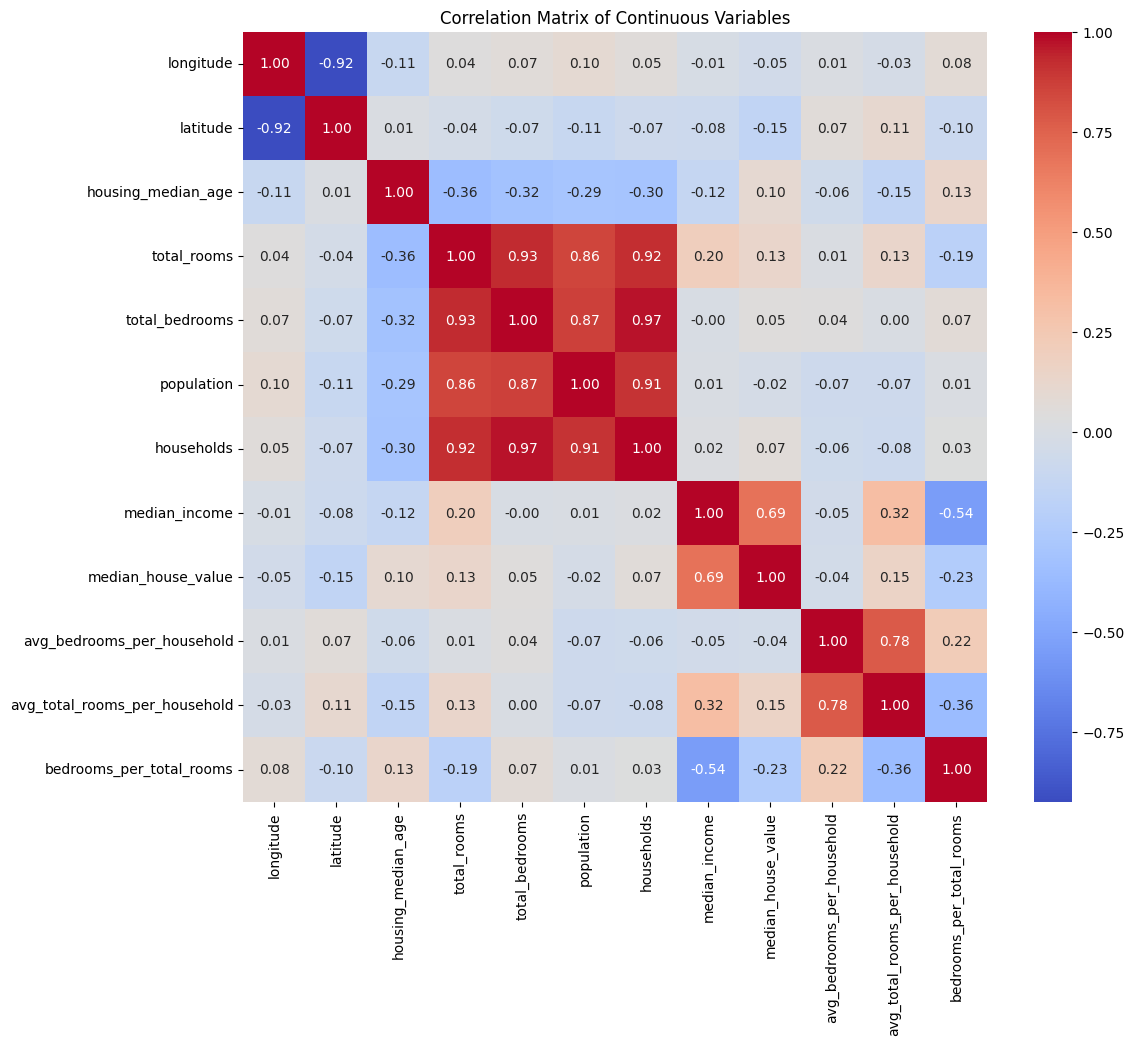

In [47]:
# prompt: Draw a correlation matrix for each continuous variable

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'housing_df' is already loaded and preprocessed as in the provided code

# Select only continuous variables for the correlation matrix
continuous_variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                        'total_bedrooms', 'population', 'households', 'median_income',
                        'median_house_value', 'avg_bedrooms_per_household',
                        'avg_total_rooms_per_household', 'bedrooms_per_total_rooms']

# Subset of the DataFrame for continuous variables
continuous_df = housing_df[continuous_variables]

# Calculate the correlation matrix
correlation_matrix = continuous_df.corr()


# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [48]:
# prompt: Use random forests with XGBoost to build a predictor that uses all variables in housing_df to predict median_house_value. Calculate error using RMSE, and calculate r squared

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Assuming 'housing_df' is already loaded and preprocessed as in the previous code

# Define features (X) and target (y)
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

# Ensure all column names are strings and do not contain invalid characters
X.columns = X.columns.astype(str).str.replace('[\[\]\<]', '', regex=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use reg:squarederror for regression
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 46667.894231473525
R-squared: 0.836556077003479


In [49]:
# prompt: Predict the variable median_house_value using all variables in housing_df. Use the linear regression with regularization. Then evaluate the regression using values like R square and other techniques

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train a Ridge Regression model (Linear Regression with L2 regularization)
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, ridge_predictions)
mae = mean_absolute_error(y_test, ridge_predictions)
mse = mean_squared_error(y_test, ridge_predictions)
rmse = mse**0.5

print(f"Ridge Regression R-squared: {r2}")
print(f"Ridge Regression Mean Absolute Error: {mae}")
print(f"Ridge Regression Mean Squared Error: {mse}")
print(f"Ridge Regression Root Mean Squared Error: {rmse}")

Ridge Regression R-squared: 0.6559818529326273
Ridge Regression Mean Absolute Error: 48450.98699089111
Ridge Regression Mean Squared Error: 4584045351.858142
Ridge Regression Root Mean Squared Error: 67705.57843972786


{'Hidden Layers': [128, 64, 32], 'Mean Absolute Error': 42124.33984375}
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Hidden Layers': [128, 64, 32],
 'Mean Absolute Error': 42124.33984375,
 'R-squared': 0.7235054969787598}


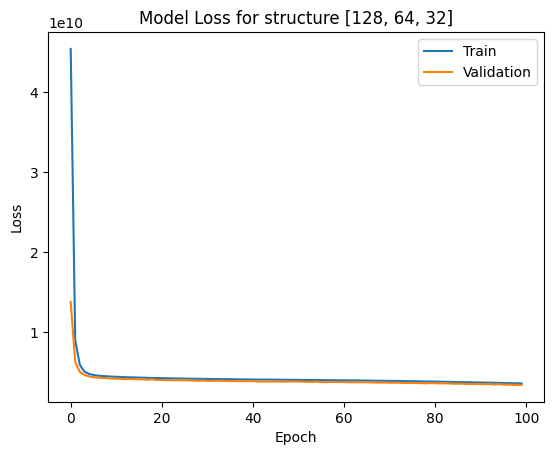

{'Hidden Layers': [64, 32], 'Mean Absolute Error': 45867.83984375}
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Hidden Layers': [64, 32],
 'Mean Absolute Error': 45867.83984375,
 'R-squared': 0.6814746260643005}


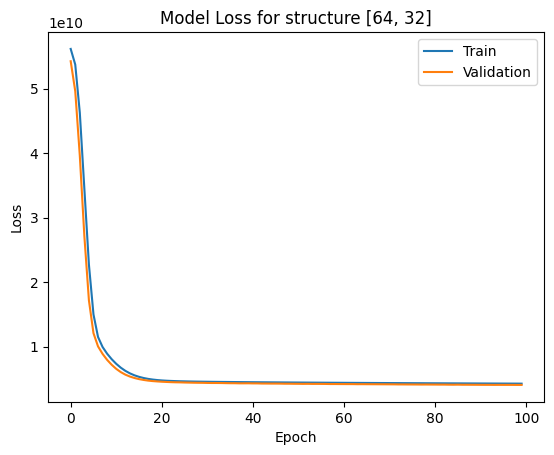

{'Hidden Layers': [128, 128, 64, 32], 'Mean Absolute Error': 38072.3515625}
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{'Hidden Layers': [128, 128, 64, 32],
 'Mean Absolute Error': 38072.3515625,
 'R-squared': 0.7683368921279907}


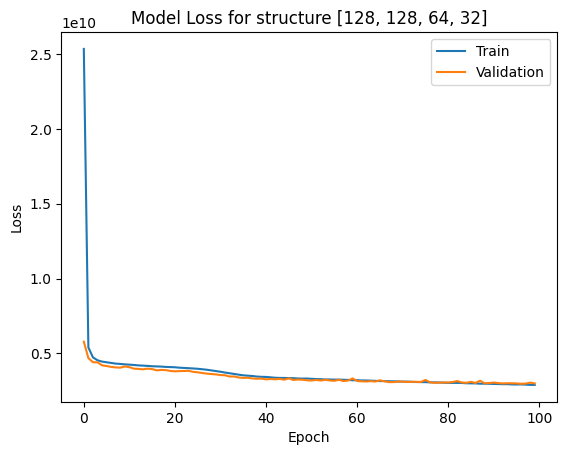

In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
from pprint import pprint

# Suppress warnings
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# List of hidden layer structures to evaluate
hidden_layer_structures = [
    [128, 64, 32],
    [64, 32],
    [128, 128, 64, 32]
]

# Neural network parameters
input_shape = X_train.shape[1]
activation_function = 'relu'
output_neurons = 1  # Output layer for regression
output_activation = None  # No activation function for regression output
optimizer = 'adam'
loss_function = 'mse'
metrics = ['mae']
epochs = 100
batch_size = 32
validation_split = 0.1

# Function to build and evaluate the model
def build_and_evaluate_model(hidden_layers):
    # Define the neural network model
    model = keras.Sequential()
    model.add(keras.layers.Dense(hidden_layers[0], activation=activation_function, input_shape=(input_shape,)))
    for units in hidden_layers[1:]:
        model.add(keras.layers.Dense(units, activation=activation_function))
    model.add(keras.layers.Dense(output_neurons, activation=output_activation))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    result = {
        'Hidden Layers': hidden_layers,
        'Mean Absolute Error': mae
    }
    pprint(result)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model and get R-squared
    r2 = r2_score(y_test, predictions)
    result['R-squared'] = r2
    pprint(result)

    # Plot the learning curve
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss for structure {hidden_layers}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Evaluate each hidden layer structure
for hidden_layers in hidden_layer_structures:
    build_and_evaluate_model(hidden_layers)

In [35]:

from sklearn.model_selection import KFold

X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

# Number of folds for cross-validation
n_splits = 5  # You can adjust this value
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
xgb_r2_scores = []
nn_r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale numerical features (important for neural networks)
    numerical_cols = X.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Ensure all column names are strings and do not contain invalid characters
    X_train.columns = X_train.columns.astype(str).str.replace('[\[\]\<]', '', regex=True)
    X_test.columns = X_test.columns.astype(str).str.replace('[\[\]\<]', '', regex=True)


    # Train and evaluate XGBoost
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_r2 = r2_score(y_test, xgb_predictions)
    xgb_r2_scores.append(xgb_r2)


    # Train and evaluate the neural network
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # Reduced epochs for faster execution during CV
    nn_predictions = model.predict(X_test)
    nn_r2 = r2_score(y_test, nn_predictions)
    nn_r2_scores.append(nn_r2)

# Print the average R-squared scores for both models
print(f"Average XGBoost R-squared: {np.mean(xgb_r2_scores)}")
print(f"Average Neural Network R-squared: {np.mean(nn_r2_scores)}")

<ipython-input-35-0cb71a6ed920>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-35-0cb71a6ed920>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-35-0cb71a6ed920>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-35-0cb71a6ed920>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-35-0cb71a6ed920>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-35-0cb71a6ed920>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-35-0cb71a6ed920>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-35-0cb71a6ed920>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-35-0cb71a6ed920>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-35-0cb71a6ed920>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Average XGBoost R-squared: 0.8268431186676025
Average Neural Network R-squared: 0.677177119255066


XGBoost R2 >> Neural Network R2